## Notebook 9: Variávies aleatórias discretas
Neste Notebook, irá aprender a lidar com variáveis aleatórias discretas. Muitas das funções que vamos utilizar estão incluídas no subpacote `random` do pacote `numpy`. Vamos importar este pacote e chamar-lhe `rnd` para não termos de estar sempre a escrever `np.random`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

### Números aleatórios
Um gerador de números aleatórios permite-lhe retirar, aleatoriamente, um número de uma distribuição em específico. Estão incluídos vários geradores de números aleatórios no subpacote `random` do pacote `numpy`. Por exemplo, a função `randint(low, high, size)` devolve aleatoriamente um array de números inteiros com a forma `size` do valor `low` ao valor `high` (não inclusive). Por exemplo, vamos atirar uma moeda ao ar 10 vezes e atribuir 0 à cara e 1 à coroa. Note que o valor `high` está especificado como `1 + 1`, o que significa que é superior em `1` ao valor que pretendemos.

In [2]:
rnd.randint(0, 1 + 1, 10)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

Se voltarmos a executar a função `rand_int`, obtemos uma sequência diferente de caras (zeros) e coroas (uns):

In [3]:
rnd.randint(0, 1 + 1, 10)

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

Internamente, o gerador de números aleatórios começa com aquilo que designamos de *seed*. O seed é um número e é gerado automaticamente (e supostamente de forma aleatória) quando executa o gerador de números aleatórios. O valor do *seed* define com exatidão a sequência de números aleatórios obtidos (por isso, algumas pessoas poderão referir que a sequência gerada é, na melhor das hipóteses, pseudoaleatória e poderá não querer utilizar a sequência para casos criptográficos importantes; mas, para o nosso objetivo, consideramo-la aleatória o suficiente). Por exemplo, vamos definir que o `seed` é igual a 10:

In [4]:
rnd.seed(10)
rnd.randint(0, 1 + 1, 10)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

Se agora voltarmos a especificar o seed como 10, podemos gerar exatamente a mesma sequência:

In [5]:
rnd.seed(10)
rnd.randint(0, 1 + 1, 10)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

A capacidade de gerar exatamente a mesma sequência é útil durante o desenvolvimento do código. Por exemplo, ao alimentar o gerador de números aleatórios, pode comparar o seu resultado ao resultado de terceiros que tentam resolver o mesmo problema.

### Atirar uma moeda ao ar
Por agora, chega de geradores de números aleatórios. Vamos atirar uma moeda ao ar 100 vezes e contar o número de vezes que sai cara (0's) e o número de vezes que sai coroa (1's):

In [6]:
flip = rnd.randint(0, 1 + 1, 100)
headcount = 0
tailcount = 0
for i in range(100):
    if flip[i] == 0:
        headcount += 1
    else:
        tailcount += 1
print('número de caras:', headcount)
print('número de coroas:', tailcount)

número de caras: 59
número de coroas: 41


Em primeiro lugar, note que a soma do número de caras e de coroas é 100. Igualmente, note como contámos as caras e as coroas. Criámos enumeradores `headcount` e `tailcount`, executados em ciclos de cada vez que a moeda é atirada, e adicionámos 1 ao enumerador adequado. Em vez de um ciclo, poderíamos ter usado uma condição para os índices combinados com um somatório, conforme indicado abaixo:

In [7]:
headcount = np.count_nonzero(flip == 0)
tailcount = np.count_nonzero(flip == 1)
print('número de caras:', headcount)
print('número de coroas:', tailcount)

número de caras: 59
número de coroas: 41


Como é que isso funciona? Poderá lembrar-se de que a instrução `flip == 0` devolve um array com comprimento 100 (igual ao comprimento de `flip`) com o valor `True` quando a condição é cumprida e `False` quando a condição não é cumprida. O booleano `True` tem o valor de 1 e o booleano `False` tem o valor de 0. Assim, basta contarmos os valores diferentes de zero com a função `np.count_nonzero` para sabermos quantos itens são `True`.

O código acima é simples, mas, se fizer uma experiência com mais de dois resultados, poderá ser moroso contar os valores diferentes de zero para cada possível resultado. Assim, vamos tentar reescrever esta parte do código utilizando um ciclo. Para este caso em específico, o número de linhas do código não diminui, mas, quando temos uma experiência com vários resultados diferentes, será muito mais eficiente. Note que `dtype='int'` define que o array é composto por números inteiros.

In [8]:
outcomes = np.zeros(2, dtype='int') # Dois resultados; caras é o outcome[0] e coroas é o outcome[1]
for i in range (2):
    outcomes[i] = np.count_nonzero(flip == i)
    print('outcome ', i, ' é ', outcomes[i])

outcome  0  é  59
outcome  1  é  41


### <a name="back1"></a>Exercício 1. Lançar um dado
Lance um dado 100 vezes e registe o número de vezes em que saiu 1, 2, 3, 4, 5 e 6. Use um *seed* de 33. Certifique-se de que a soma dos valores registados é 100. Certifique-se de que utiliza um ciclo no código, conforme fizemos na célula de código anterior.

<a href="#ex1answer">Soluções do Exercício 1</a>

### Atirar uma moeda ao ar duas vezes
Em seguida, vamos atirar a moeda ao ar duas vezes e fazer 100 lançamentos para contarmos o número de vezes que sai coroa. Geramos um array aleatório de zeros (caras) e uns (coroas) com duas linhas (porque cada lançamento corresponde a atirar a moeda ao ar duas vezes) e 100 colunas. A soma das duas linhas representa o número de coroas. A função `np.sum` assume um array e, por predefinição, soma todos os valores no array e devolve um número. Neste caso, queremos somar as linhas. Para tal, a função `sum` tem um argumento de palavra-chave designado `axis`, em que `axis=0` soma o índice 0 do array (as linhas), `axis=1` soma o índice 1 do array (as colunas), etc.

In [9]:
rnd.seed(55)
flips = rnd.randint(low=0, high=1 + 1, size=(2, 100))
tails = np.sum(flips, axis=0)
number_of_tails = np.zeros(3, dtype='int')
for i in range(3):
    number_of_tails[i] = np.count_nonzero(tails == i)
print('número de 0, 1, 2 coroas:', number_of_tails)

número de 0, 1, 2 coroas: [27 47 26]


Outra forma de simular o lançamento de uma moeda duas vezes é retirar um número de forma aleatória de um conjunto de 2 números (0 e 1). Tem de substituir o número a cada lançamento, claro. A função `numpy` para obter um número aleatório de um dado array designa-se `choice`. A função `choice` tem uma palavra-chave para especificar se os valores são ou não substituídos. Assim, os dois métodos seguintes para gerar 5 lançamentos são idênticos.

In [10]:
rnd.seed(55)
flips1 = rnd.randint(low=0, high=1 + 1, size=5)
rnd.seed(55)
flips2 = rnd.choice(range(2), size=5, replace=True)
np.alltrue(flips1 == flips2)  # Verifica se todos os valores nos dois arrays são iguais

True

### Gráfico de barras
O resultado de uma experiência pode ser apresentado num gráfico de barras.

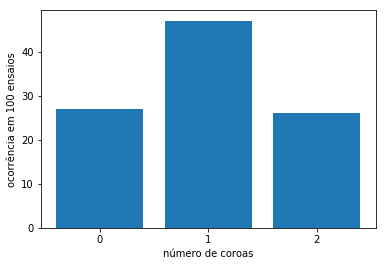

In [11]:
plt.bar(range(0, 3), number_of_tails)
plt.xticks(range(0, 3))
plt.xlabel('número de coroas')
plt.ylabel('ocorrência em 100 ensaios');

### Probabilidade acumulada
Em seguida, calculamos a probabilidade experimental de sair 0 coroas, 1 coroa e 2 coroas através da divisão pelo número total de ensaios (um ensaio corresponde a dois lançamentos da moeda). A soma das três probabilidades é 1. A distribuição de probabilidade acumulada é obtida pela soma acumulada das probabilidades através da função `cumsum` do pacote `numpy`. O primeiro valor é a probabilidade de saírem 0 coroas. O segundo valor é a probabilidade de sair 1 ou menos coroas e o terceiro valor é a probabilidade de saírem 2 ou menos coroas. A probabilidade é calculada através da divisão do número de coroas pelo número total de ensaios.

In [12]:
prob = number_of_tails / 100  # number_of_tails foi calculado em células anteriores
cum_prob = np.cumsum(prob) # Por isso cum_prob[0] = prob[0], cum_prob[1] = prob[0] + prob[1], etc.
print('cum_prob ', cum_prob)

cum_prob  [ 0.27  0.74  1.  ]


A distribuição de probabilidade acumulada é representada num gráfico de barras, assegurando que todas as barras se tocam entre si (ao definir a largura como 1, no caso abaixo).

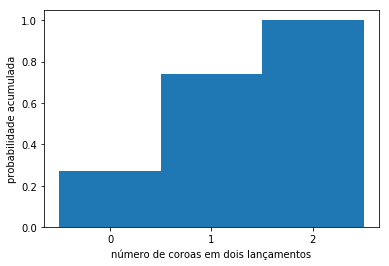

In [13]:
plt.bar(range(0, 3), cum_prob, width=1)
plt.xticks(range(0, 3))
plt.xlabel('número de coroas em dois lançamentos')
plt.ylabel('probabilidade acumulada');

### <a name="back2"></a>Exercício 2. Atirar uma moeda ao ar cinco vezes
Atire uma moeda ao ar cinco vezes seguidas e registe quantas vezes sai coroa (variando de 0 a 5). Repita 1000 vezes. Crie um gráfico de barras com o número total de vezes que saiu coroa no eixo horizontal e, no eixo vertical, a probabilidade empiricamente calculada para obter esse número de coroas. Execute o seu código várias vezes (carregue em [shift]+[enter]) e veja como o gráfico muda ligeiramente de cada vez, uma vez que a sequência de números aleatórios muda.

Calcule a probabilidade acumulada. Represente os valores no ecrã e crie uma representação gráfica da função de probabilidade acumulada através de um gráfico de barras.

<a href="#ex2answer">Soluções do Exercício 2</a>

### Probabilidade de uma variável de Bernoulli
No exercício anterior, calculámos a probabilidade de sair um determinado número de caras em cinco lançamentos de forma experimental. No entanto, podemos calcular o valor exato com algumas fórmulas simples. Considere a variável aleatória $Y$, que é o resultado de uma experiência com dois possíveis valores: 0 e 1. Permita que $p$ seja a probabilidade de sucesso, $p=P(Y=1)$. Assim, $Y$ será a variável de Bernoulli. A experiência é repetida $n$ vezes e definimos $X$ como o número de sucessos na experiência. A variável $X$ tem uma distribuição binomial com parâmetros $n$ e $p$. A probabilidade de $X$ assumir o valor $k$ pode ser calculada como vemos abaixo (veja, por exemplo, [aqui](http://en.wikipedia.org/wiki/Binomial_distribution))

$$P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}$$

O termo $\binom{n}{k}$ pode ser calculado com a função `comb`, que tem de ser importada do pacote `scipy.misc`.

### <a name="back3"></a>Exercício 3. Atirar uma moeda ao ar cinco vezes (continuação)
Regresse à experiência que envolvia lançar uma moeda cinco vezes seguidas e registe quantas vezes sai coroa. Calcule a probabilidade teórica para 0, 1, 2, 3, 4 e 5 coroas e compare a sua resposta com a probabilidade calculada de 1000 ensaios, 10 000 ensaios e 100 000 ensaios (use um ciclo para estes três conjuntos de ensaios).

<a href="#ex3answer">Soluções do Exercício 3</a>

### <a name="back4"></a>Exercício 4. Valor máximo de dois lançamentos do dado
Lance um dado duas vezes e registe o valor máximo dos dois lançamentos. Use a função `np.max` para calcular o valor máximo. Tal como a função `np.sum`, a função `np.max` assume um array como argumento de entrada e tem um argumento de palavra-chave opcional designado `axis`. Repita a experiência 1000 vezes e calcule a probabilidade de o valor mais alto ser 1, 2, 3, 4, 5 ou 6. Crie um gráfico da função de distribuição de probabilidade acumulada através de um gráfico de degraus.

<a href="#ex4answer">Soluções do Exercício 4</a>

### <a name="back5"></a>Exercício 5. Valor máximo de dois lançamentos do dado (continuação)
Consulte o Exercício 4.
Calcule o valor teórico da probabilidade do valor do dado mais alto ao lançar o dado duas vezes (os lançamentos são identificados como T1 e T2, respetivamente). Existem 36 possíveis resultados para esta experiência. Defina $M$
como a variável aleatória correspondente a esta experiência (isto significa, por exemplo, que $M=3$ quando o primeiro lançamento é um 2 e o segundo é um 3). Todos os resultados de $M$ podem ser facilmente registados, conforme indicado na tabela seguinte:

| T1$\downarrow$ T2$\to$ | 1 | 2 | 3 | 4 | 5 | 6 |
|-----------:|------------:|:------------:|
|  1 | 1 | 2 | 3 | 4 | 5 | 6 |
|  2 | 2 | 2 | 3 | 4 | 5 | 6 |
|  3 | 3 | 3 | 3 | 4 | 5 | 6 |
|  4 | 4 | 4 | 4 | 4 | 5 | 6 |
|  5 | 5 | 5 | 5 | 5 | 5 | 6 |
|  6 | 6 | 6 | 6 | 6 | 6 | 6 |


Use os 36 possíveis resultados apresentados na tabela para calcular a probabilidade teórica de $M$ ser 1, 2, 3, 4, 5 ou 6. Compare o resultado teórico com o resultado experimental para 100, 1000 e 10 000 lançamentos do dado.

<a href="#ex5answer">Soluções do Exercício 5</a>

### Gerar números inteiros aleatórios sem probabilidades não-equiprováveis
Até agora, gerámos números aleatórios cuja probabilidade de cada resultado foi sempre a mesma (caras ou coroas, ou os números de um dado, considerando que o lançamento do objeto seria “justo”). E se agora quisermos gerar resultados que não têm a mesma probabilidade? Por exemplo, considere o caso em que temos um balde com 4 bolas azuis e 6 bolas vermelhas. Quando retira uma bola aleatoriamente, a probabilidade de ser uma bola azul é de 0,4 e a probabilidade de ser uma bola vermelha é de 0,6. Uma sequência com dez bolas, com substituição, poderá ser gerada da seguinte forma:

In [14]:
balls = np.zeros(10, dtype='int') # zero é azul
balls[4:] = 1  # um é vermelho
print('bolas:', balls)
drawing = rnd.choice(balls, 10, replace=True)
print('extração:', drawing)
print('bolas azuis:', np.count_nonzero(drawing == 0))
print('bolas vermelhas:', np.count_nonzero(drawing == 1))

bolas: [0 0 0 0 1 1 1 1 1 1]
extração: [1 1 1 0 1 0 0 1 1 0]
bolas azuis: 4
bolas vermelhas: 6


### <a name="back6"></a>Exercício 6. Previsão de eleições
Considere um sufrágio com um milhão de eleitores. 490 000 pessoas vão votar no candidato $A$ e 510 000 vão votar no candidato $B$. Na véspera da eleição, a empresa de Maurice "The Dog" efetua uma sondagem com 1000 eleitores escolhidos aleatoriamente. Calcule se a empresa irá prever o vencedor corretamente através da abordagem explicada acima e com um *seed* de 2.

Efetue a sondagem 1000 vezes. Conte o número de vezes em que o resultado da sondagem dá a vitória ao candidato $A$
e o número de vezes em que o resultado da sondagem dá a vitória ao candidato $B$. Qual é a probabilidade de a empresa prever o vencedor certo com base nestas 1000 sondagens com 1000 pessoas?

Calcule a probabilidade de a empresa prever o vencedor certo com base em 1000 sondagens com 5000 pessoas. A probabilidade de a empresa prever o vencedor certo aumenta significativamente ao fazer uma sondagem com 5000 pessoas?

<a href="#ex6answer">Soluções do Exercício 6</a>

### Soluções dos exercícios

<a name="ex1answer">Soluções do Exercício 1</a>

In [15]:
rnd.seed(33)
dicethrow = rnd.randint(1, 6 + 1, 100)
side = np.zeros(6, dtype='int')
for i in range(6):
    side[i] = np.count_nonzero(dicethrow == i + 1)
    print('número de vezes em que saiu', i + 1, 'é de', side[i])
print('número total de lançamentos ', sum(side))

número de vezes em que saiu 1 é de 17
número de vezes em que saiu 2 é de 17
número de vezes em que saiu 3 é de 15
número de vezes em que saiu 4 é de 24
número de vezes em que saiu 5 é de 19
número de vezes em que saiu 6 é de 8
número total de lançamentos  100


<a href="#back1">Voltar ao Exercício 1</a>

<a name="ex2answer">Soluções do Exercício 2</a>

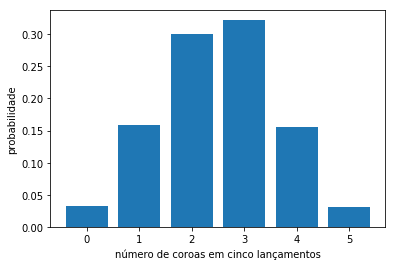

In [16]:
N = 1000
tails = np.sum(rnd.randint(0, 1 + 1, (5, 1000)), axis=0)
counttails = np.zeros(6, dtype='int')
for i in range(6):
    counttails[i] = np.count_nonzero(tails == i)
plt.bar(range(0, 6), counttails / N)
plt.xlabel('número de coroas em cinco lançamentos')
plt.ylabel('probabilidade');

cumprob: [ 0.033  0.192  0.491  0.812  0.968  1.   ]


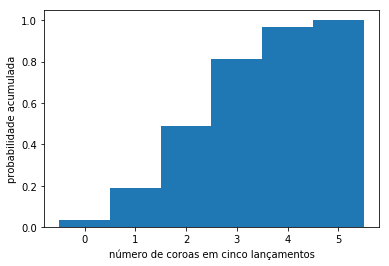

In [17]:
cumprob = np.cumsum(counttails / N)
print('cumprob:', cumprob)
plt.bar(range(0, 6), cumprob, width=1)
plt.xlabel('número de coroas em cinco lançamentos')
plt.ylabel('probabilidade acumulada');

<a href="#back2">Voltar ao Exercício 2</a>

<a name="ex3answer">Soluções do Exercício 3</a>

In [18]:
from scipy.misc import comb
print('Probabilidades teóricas:')
for k in range(6):
    print(k, ' coroas ', comb(5, k) * 0.5 ** k * 0.5 ** (5 - k))
for N in (1000, 10000, 100000):
    tails = np.sum(rnd.randint(0, 1 + 1, (5, N)), axis=0)
    counttails = np.zeros(6)
    for i in range(6):
        counttails[i] = np.count_nonzero(tails==i)
    print('Probabilidade com', N, 'ensaios: ', counttails / float(N))

Probabilidades teóricas:
0  coroas  0.03125
1  coroas  0.15625
2  coroas  0.3125
3  coroas  0.3125
4  coroas  0.15625
5  coroas  0.03125
Probabilidade com 1000 ensaios:  [ 0.031  0.16   0.307  0.334  0.139  0.029]
Probabilidade com 10000 ensaios:  [ 0.0315  0.1579  0.3083  0.3098  0.1634  0.0291]
Probabilidade com 100000 ensaios:  [ 0.03093  0.15591  0.31454  0.31266  0.15484  0.03112]


<a href="#back3">Voltar ao Exercício 3</a>

<a name="ex4answer">Soluções do Exercício 4</a>

/Users/elsaoliveira/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


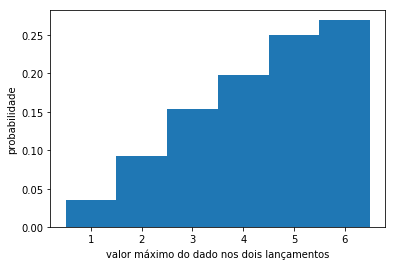

In [19]:
dice = rnd.randint(1, 6 + 1, (2, 1000))
highest_dice = np.max(dice, 0)
outcome = np.zeros(6)
for i in range(6):
    outcome[i] = np.sum(highest_dice == i + 1) / 1000
plt.bar(left=np.arange(1, 7), height=outcome, width=1)
plt.xlabel('valor máximo do dado nos dois lançamentos')
plt.ylabel('probabilidade');

<a href="#back4">Voltar ao Exercício 4</a>

<a name="ex5answer">Soluções do Exercício 5</a>

In [20]:
for N in [100, 1000, 10000]:
    dice = rnd.randint(1, 6 + 1, (2, N))
    highest_dice = np.max(dice, axis=0)
    outcome = np.zeros(6)
    for i in range(6):
        outcome[i] = np.sum(highest_dice == i + 1) / N
    print('Outcome para', N, 'lançamentos: ', outcome)
# Exact values
exact = np.zeros(6)
for i, j in enumerate(range(1, 12, 2)):
    exact[i] = j / 36
print('Probabilidades exatas: ',exact)

Outcome para 100 lançamentos:  [ 0.01  0.03  0.19  0.13  0.27  0.37]
Outcome para 1000 lançamentos:  [ 0.035  0.076  0.142  0.189  0.262  0.296]
Outcome para 10000 lançamentos:  [ 0.0258  0.0862  0.1323  0.1924  0.248   0.3153]
Probabilidades exatas:  [ 0.02777778  0.08333333  0.13888889  0.19444444  0.25        0.30555556]


<a href="#back5">Voltar ao Exercício 5</a>

<a name="ex6answer">Soluções do Exercício 6</a>

In [21]:
rnd.seed(2)
people = np.zeros(1000000, dtype='int')  # o candidato A é 0
people[490000:] = 1  # o candidato B é 1
pole = rnd.choice(people, 1000)
poled_for_A = np.count_nonzero(pole == 0)
print('votos para A:', poled_for_A)
if poled_for_A > 500: 
    print('The Dog irá prever o vencedor errado')
else:
    print('The Dog irá prever o vencedor certo')

votos para A: 508
The Dog irá prever o vencedor errado


In [22]:
Awins = 0
Bwins = 0
for i in range(1000):
    people = np.zeros(1000000, dtype='int')  # o candidato A é 0
    people[490000:] = 1  # o candidato B é 1
    pole = rnd.choice(people, 1000)
    poled_for_A = np.count_nonzero(pole == 0)
    if poled_for_A > 500: 
        Awins += 1
    else:
        Bwins += 1
print('1000 sondagens com 1000 pessoas')
print('Probabilidade de que The Dog prevê que o candidato A vença:', Awins / 1000)

1000 sondagens com 1000 pessoas
Probabilidade de que The Dog prevê que o candidato A vença: 0.267


In [23]:
Awins = 0
Bwins = 0
for i in range(1000):
    people = np.zeros(1000000, dtype='int')  # o candidato A é 0
    people[490000:] = 1  # o candidato B é 1
    pole = rnd.choice(people, 5000)
    poled_for_A = np.count_nonzero(pole == 0)
    if poled_for_A > 2500: 
        Awins += 1
    else:
        Bwins += 1
print('1000 sondagens com 5000 pessoas')
print('Probabilidade de que The Dog prevê que o candidato A vença:', Awins / 5000)

1000 sondagens com 5000 pessoas
Probabilidade de que The Dog prevê que o candidato A vença: 0.014


<a href="#back6">Voltar ao Exercício 6</a>

A obra "Notebook 9: Variáveis aleatórias discretas" é um derivado de [Notebook 9: Discrete random variables](http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook9_discrete_random_variables/py_exploratory_comp_9_sol.ipynb) de [mbakker7](https://github.com/mbakker7), sob a licença CC BY (4.0 Licença Internacional). "Notebook 9: Variáveis aleatórias discretas" é publicado sob a licença CC BY (4.0 Licença Internacional) por Educa2030.